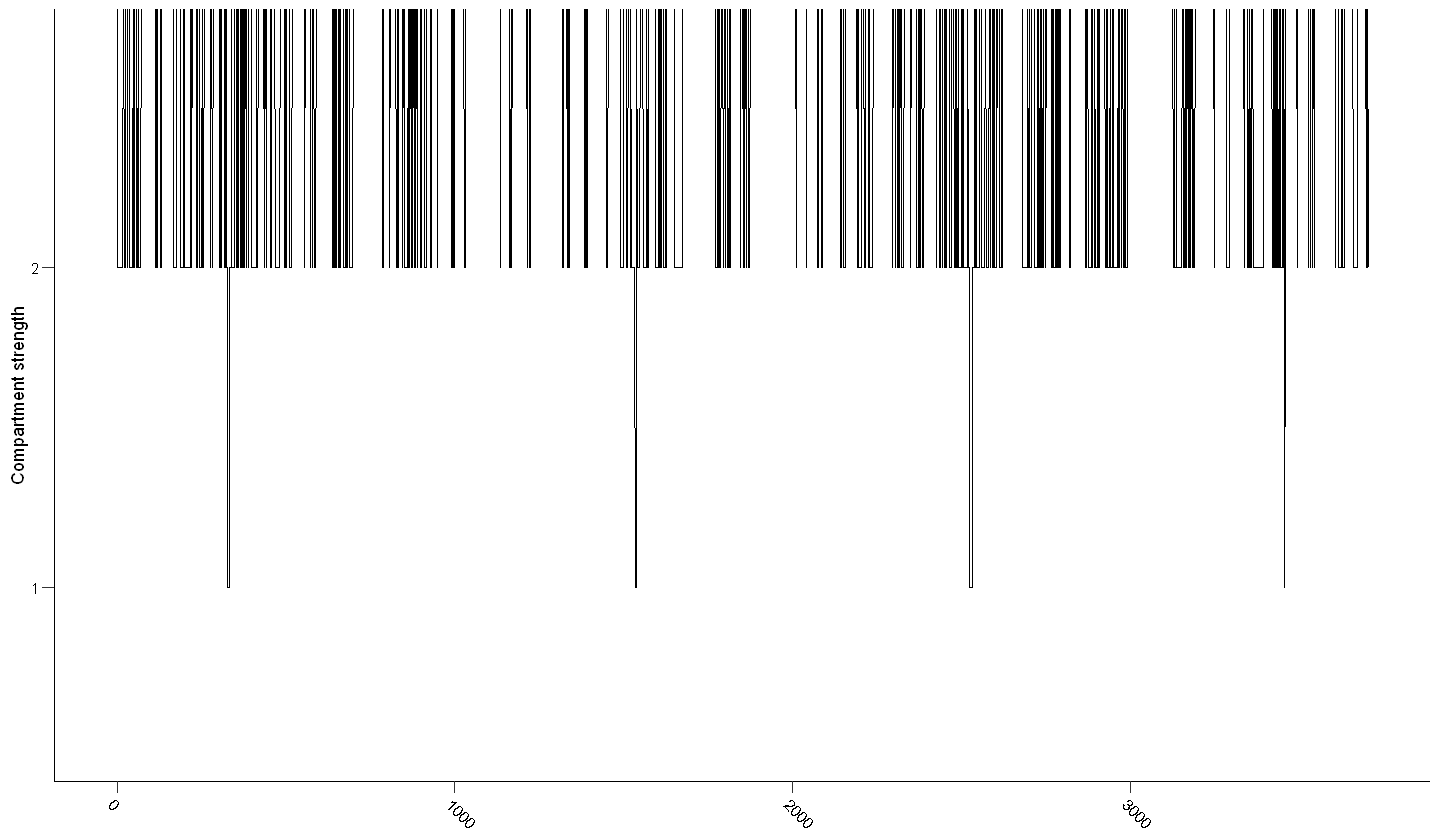

In [1]:
## 分析不同类型的loop对于基因表达的影响
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
rm(list = ls())
setwd("G:/J668_multip_tissue_3D-genome/HiC/compartment/dcHiC/diff_compartment/number_subcompartment")
library(ggplot2)
library(ggpubr)
df <- read.csv("all_diff_subcompartment_number.txt", sep = "\t", header =T)
fg <- ggplot(df, aes(x = index, y = number)) +
geom_line() +
#geom_point(colour = '#8C8C8C', alpha = 0.8)+
#geom_violin()+
facet_grid(.~variable) +
coord_cartesian(ylim = c(0.5,2.7))+
labs(y = "Compartment strength", x = NULL) +
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = "none",
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black"),
     axis.text.x = element_text(angle = 315, hjust=0)
     ) 
fg
#ggsave(plot =fg, filename = 'cis_strength.pdf', height =5.5, width = 12)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



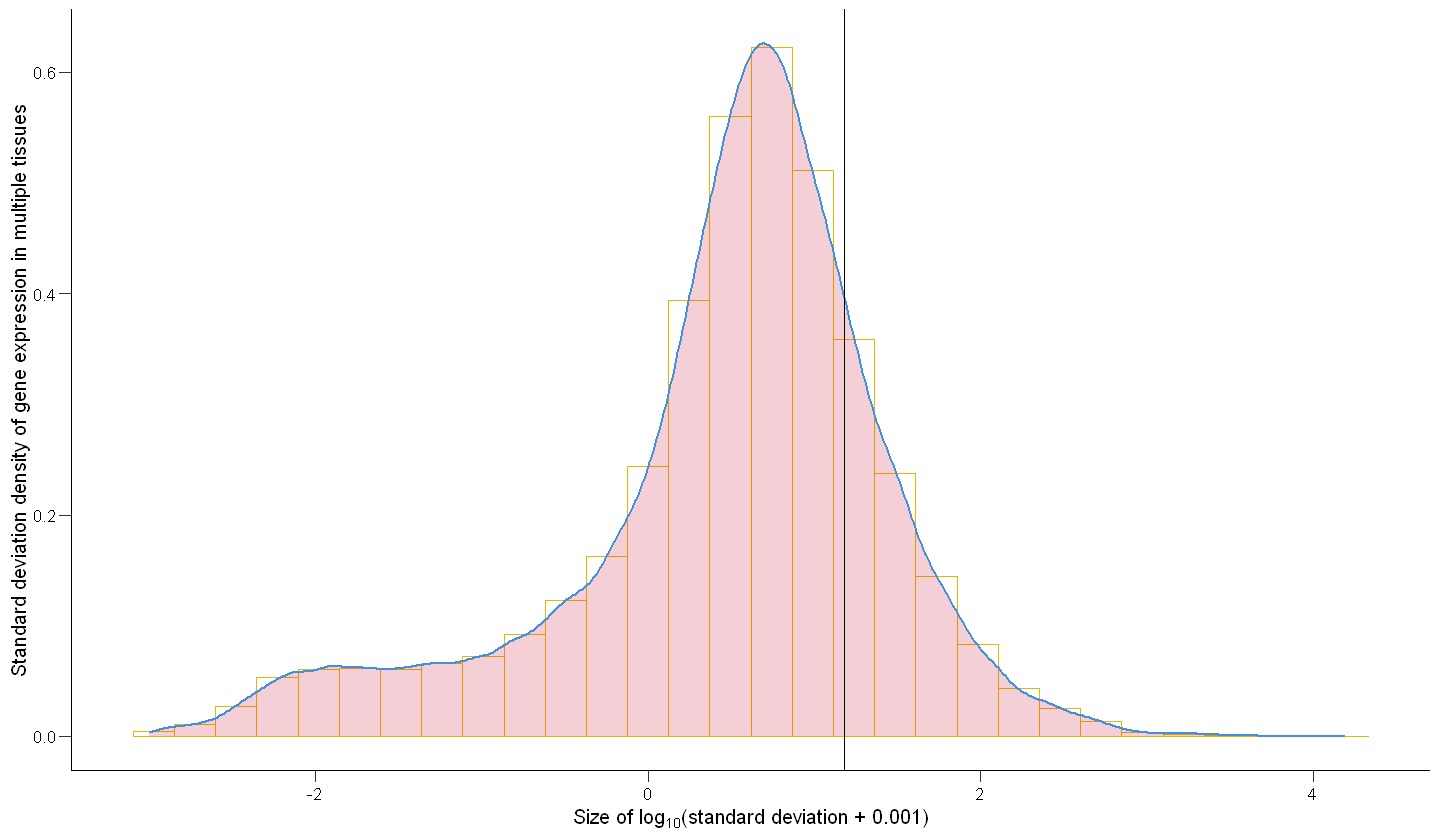

In [3]:
## 分析基因在组织间表达的标准差分布
## 分析不同类型的loop对于基因表达的影响
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation")
library(ggplot2)
library(ggpubr)
df <- read.csv("J668_all_tissue_average_TPM_std.txt", sep = "\t", header =T)
df <- df[df$std>0, ]
x_titles <- expression(paste('Size of log'[10], "(standard deviation + 0.001)"))
fg <- ggplot(df, aes(x = log10(std+0.001))) +
geom_histogram(aes(y = stat(density)), fill = 'white', color = '#E7B800') +
geom_density(color='#418FDE', size=0.8, alpha = 0.2, fill = "#C8102E") +
geom_vline(xintercept = 1.18)+
labs(y = "Standard deviation density of gene expression in multiple tissues", x = x_titles) +
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = "none",
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =10),
     axis.title = element_text(color = "black", size=12),
     axis.text.x = element_text()) 
fg
ggsave(plot =fg, filename = 'J668_all_tissue_average_TPM_std2.pdf', height =3, width = 4)

[1] "anthers"     "leaf"        "hypocotyl"   "cotyledon"   "stem"       
 [6] "root"        "radicle"     "ovules"      "fiber_5DPA"  "fiber_10DPA"
[11] "fiber_20DPA" "petals"      "stigma"

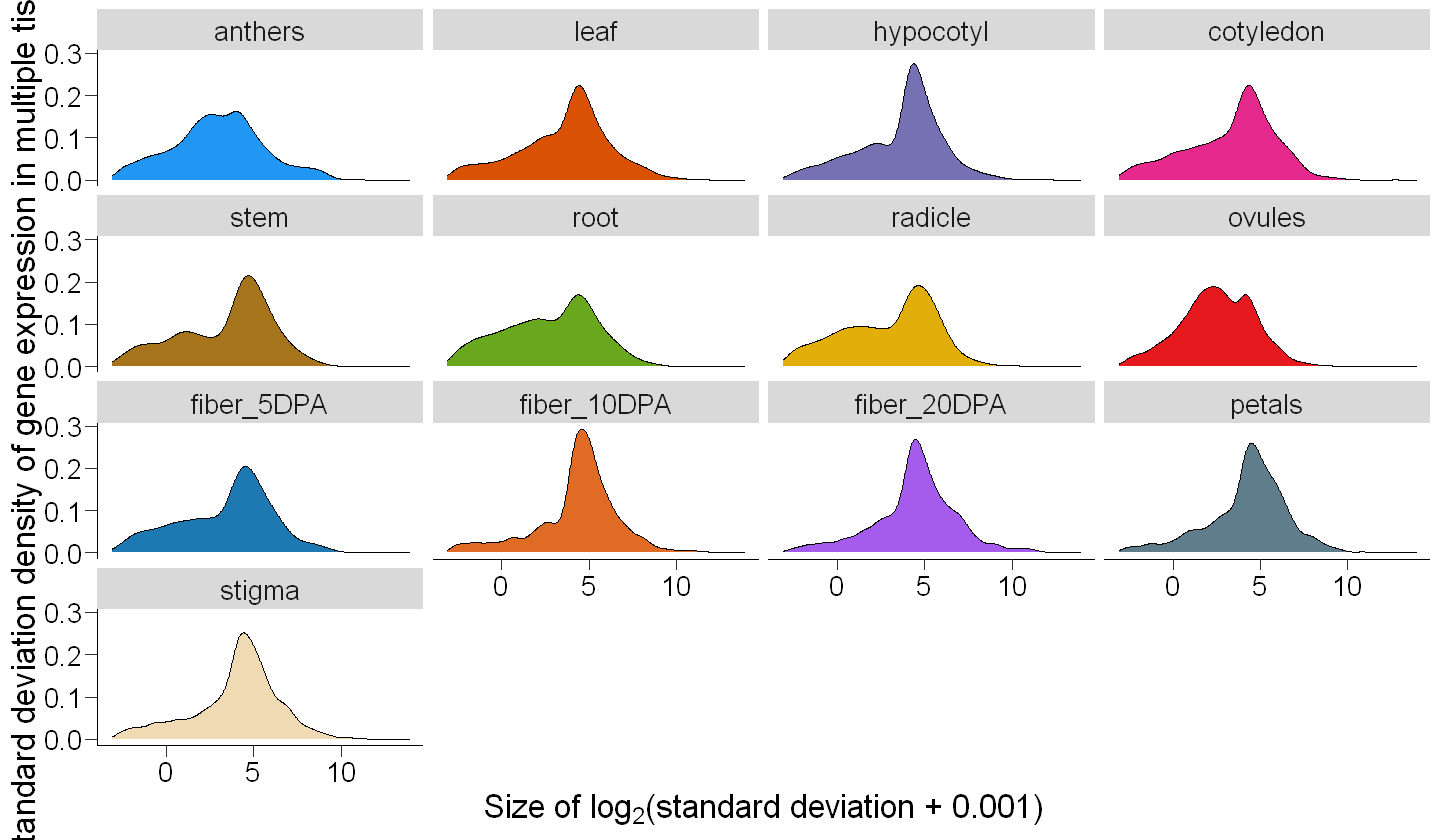

In [24]:
## 分析基因在组织间表达的标准差分布
## 分析不同类型的loop对于基因表达的影响
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/uniq_tissue_std")
library(ggplot2)
library(ggpubr)
df <- read.csv("unique_tissue_exp_gene_std.txt", sep = "\t", header =T)
df <- within(df, max_idx <- factor(max_idx, levels = c('anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovules', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma')))
with(df, levels(max_idx))
x_titles <- expression(paste('Size of log'[2], "(standard deviation + 0.001)"))
fg <- ggplot(df, aes(x = log2(std+0.001), fill=max_idx)) +
#geom_histogram(aes(y = stat(density)), fill = 'white', color = '#E7B800') +
geom_density() +
#geom_vline(xintercept = 1.18)+
labs(y = "Standard deviation density of gene expression in multiple tissues", x = x_titles) +
facet_wrap(.~max_idx)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.x = element_text(size = 16)) +
scale_fill_manual(values = c("#2196F3", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#69A71E", "#E2AE09", "#E6191E", "#1E79B2", "#df6b24", '#A55CED', "#607D8B", "#efdab4"))
fg
ggsave(plot =fg, filename = 'unique_tissue_exp_gene_std.pdf', height =10, width = 12)

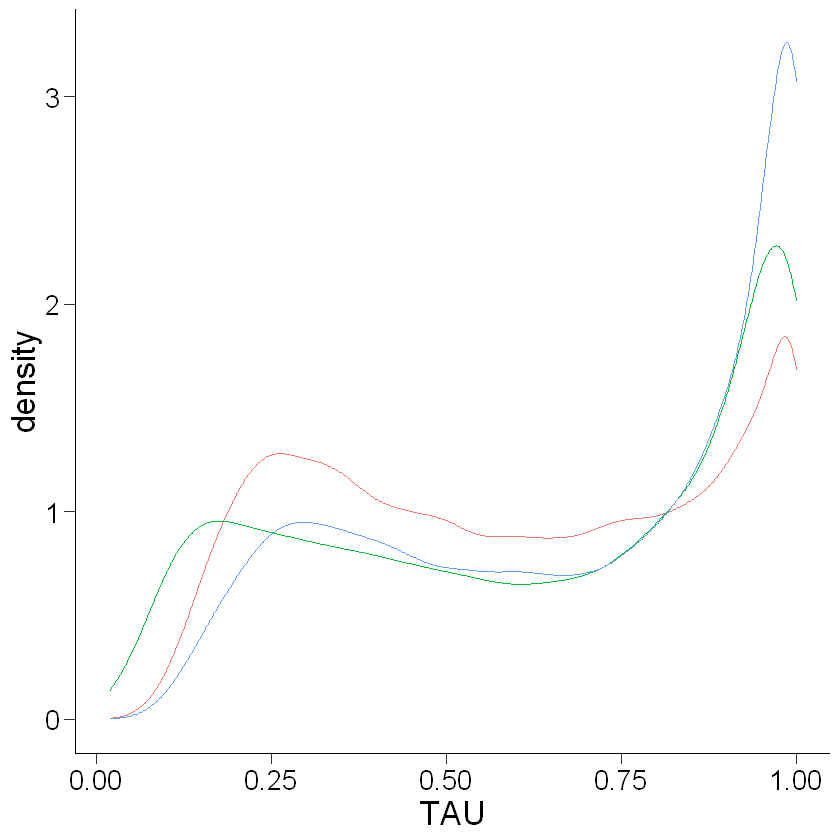

In [17]:
## 分析基因tau和gini的密度分布
#options(repr.plot.width=12)
library(ggplot2)
library(dplyr) 
library(reshape2)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini")
library(ggplot2)
library(ggpubr)
df <- read.csv("cotton_human_mouse_tau.txt", sep = "\t", header =T)
# df <- within(df, max_idx <- factor(max_idx, levels = c('anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovules', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma')))
# with(df, levels(max_idx))
#x_titles <- expression(paste('Size of log'[2], "(standard deviation + 0.001)"))
#df_tau_gini <- select(df, 'GeneId', 'TAU', 'Gini')
#df_tau_gini_long <- melt(df_tau_gini, id.vars=c('GeneId'))
df_true <- df[df$TAU>=0.01, ]
fg <- ggplot(df_true, aes(x = TAU, color=species)) +
#geom_histogram(aes(y = stat(density)), fill = 'white', color = '#E7B800') +
geom_density() +
#geom_vline(xintercept = 1.18)+
#labs(y = "Standard deviation density of gene expression in multiple tissues", x = x_titles) +
#facet_wrap(.~max_idx)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.x = element_text(size = 16)) +
scale_fill_manual(values = c("#2196F3", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#69A71E", "#E2AE09", "#E6191E", "#1E79B2", "#df6b24", '#A55CED', "#607D8B", "#efdab4"))
fg
ggsave(plot =fg, filename = 'cotton_human_mouse_tau.pdf', height =3, width = 5)

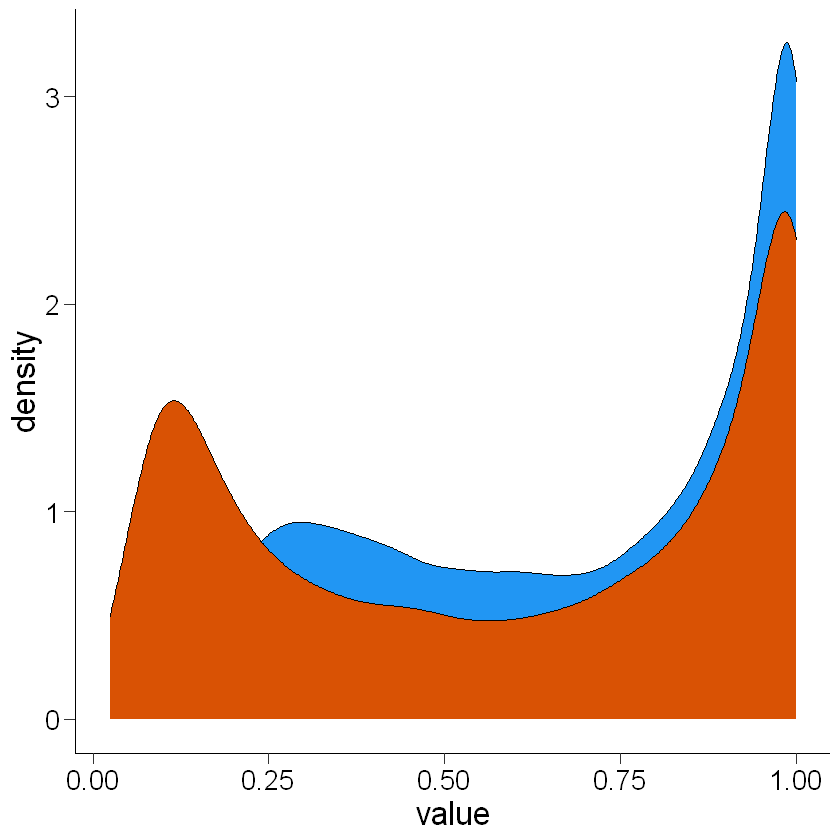

In [11]:
## 分析基因tau和gini的密度分布
#options(repr.plot.width=12)
library(ggplot2)
library(dplyr) 
library(reshape2)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini")
library(ggplot2)
library(ggpubr)
df <- read.csv("MusENCODETScomparisonTable_9_22.txt", sep = "\t", header =T)
# df <- within(df, max_idx <- factor(max_idx, levels = c('anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovules', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma')))
# with(df, levels(max_idx))
#x_titles <- expression(paste('Size of log'[2], "(standard deviation + 0.001)"))
df_tau_gini <- select(df, 'Ensembl.Gene.ID', 'Tau', 'Gini')
df_tau_gini_long <- melt(df_tau_gini, id.vars=c('Ensembl.Gene.ID'))
fg <- ggplot(df_tau_gini_long, aes(x = value, fill=variable)) +
#geom_histogram(aes(y = stat(density)), fill = 'white', color = '#E7B800') +
geom_density() +
#geom_vline(xintercept = 1.18)+
#labs(y = "Standard deviation density of gene expression in multiple tissues", x = x_titles) +
#facet_wrap(.~max_idx)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.x = element_text(size = 16)) +
scale_fill_manual(values = c("#2196F3", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#69A71E", "#E2AE09", "#E6191E", "#1E79B2", "#df6b24", '#A55CED', "#607D8B", "#efdab4"))
fg
# ggsave(plot =fg, filename = 'unique_tissue_exp_gene_std.pdf', height =10, width = 12)

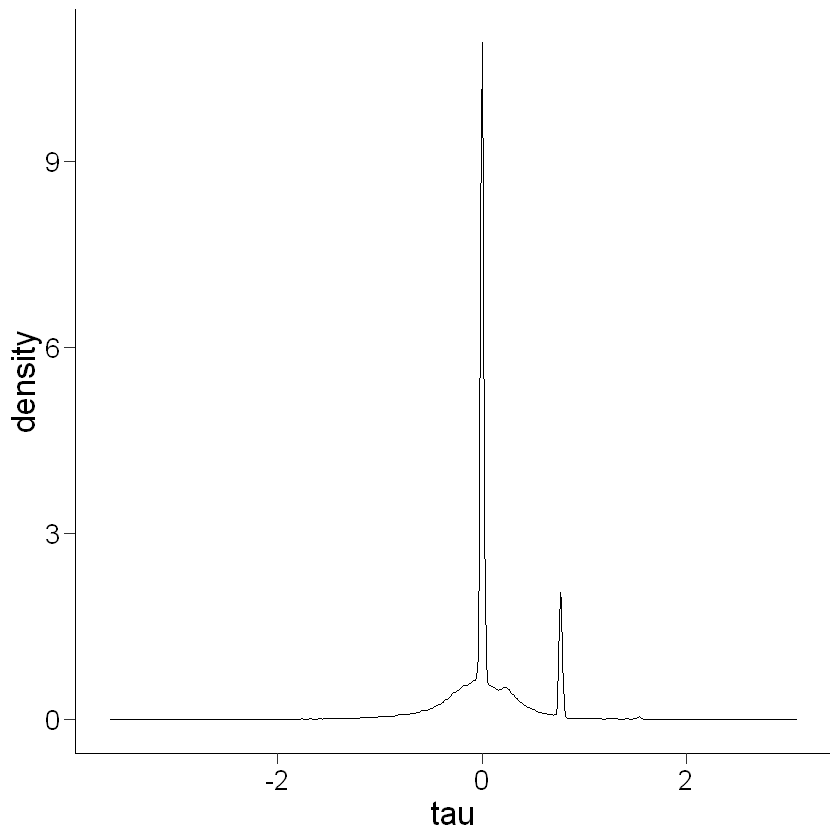

In [18]:
## 分析基因tau和gini的密度分布
#options(repr.plot.width=12)
library(ggplot2)
library(dplyr) 
library(reshape2)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini")
library(ggplot2)
library(ggpubr)
df <- read.csv("test.txt", sep = "\t", header =T)
# df <- within(df, max_idx <- factor(max_idx, levels = c('anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovules', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma')))
# with(df, levels(max_idx))
#x_titles <- expression(paste('Size of log'[2], "(standard deviation + 0.001)"))
# df_tau_gini <- select(df, 'Ensembl.Gene.ID', 'Tau', 'Gini')
# df_tau_gini_long <- melt(df_tau_gini, id.vars=c('Ensembl.Gene.ID'))
fg <- ggplot(df, aes(x = tau)) +
#geom_histogram(aes(y = stat(density)), fill = 'white', color = '#E7B800') +
geom_density() +
#geom_vline(xintercept = 1.18)+
#labs(y = "Standard deviation density of gene expression in multiple tissues", x = x_titles) +
#facet_wrap(.~max_idx)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.x = element_text(size = 16)) +
scale_fill_manual(values = c("#2196F3", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#69A71E", "#E2AE09", "#E6191E", "#1E79B2", "#df6b24", '#A55CED', "#607D8B", "#efdab4"))
fg
# ggsave(plot =fg, filename = 'unique_tissue_exp_gene_std.pdf', height =10, width = 12)

Warning message:
"Ignoring unknown parameters: width"


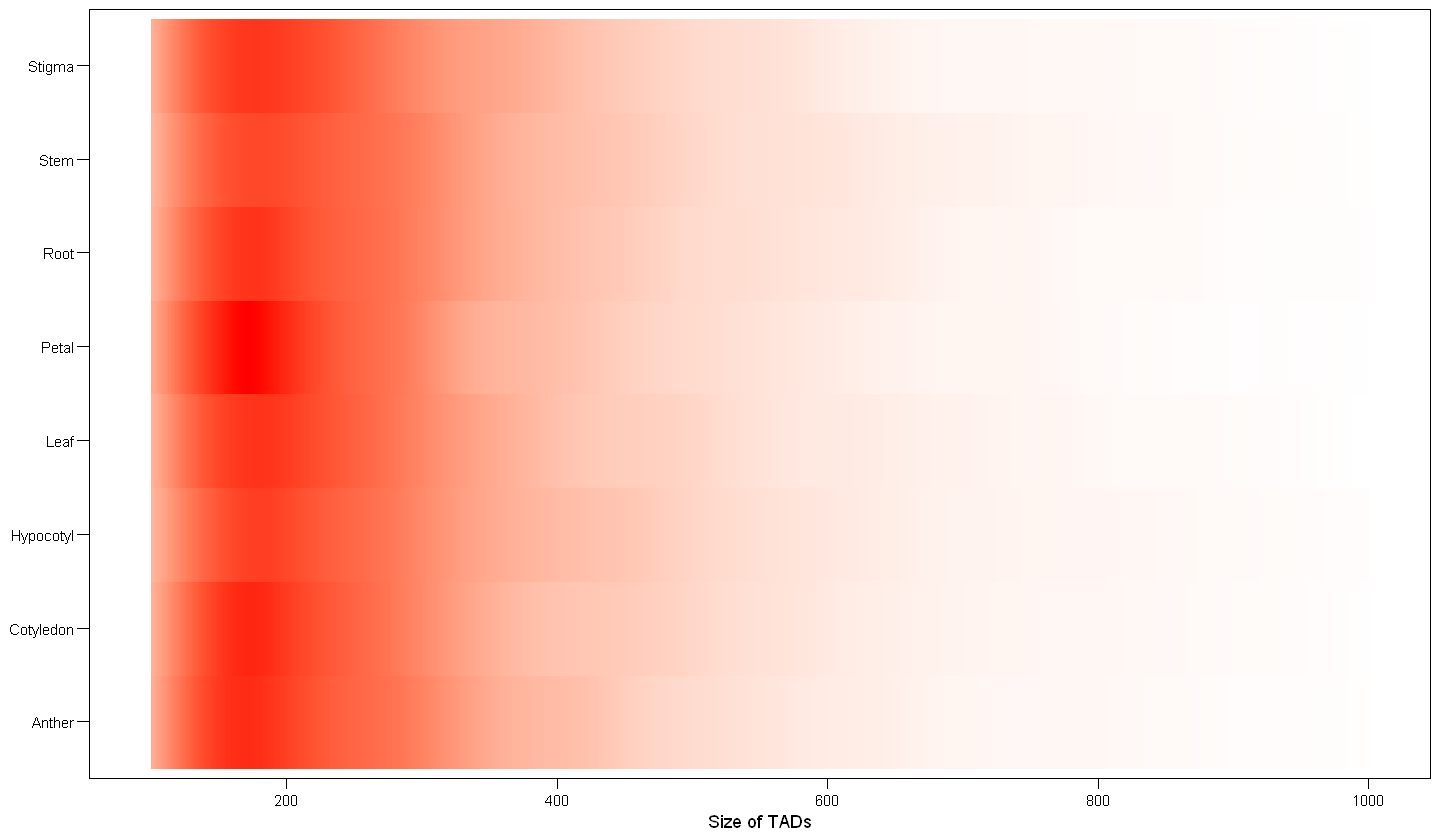

In [27]:
### 绘制TAD 大小热图
rm(list = ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/TAD_size')
library(ggplot2)

df <- read.csv('all_tissues_TAD_size.bed', sep = '\t', header = T)
df <- df[df$Size<=1000 & df$Subgenome=='At', ]
p <- ggplot(df, aes(x=Size, y=factor(Tissue)))+
  #geom_point()+
  #stat_bin2d(aes(fill = after_stat(count)))+
  stat_density(aes(fill = after_stat(density)), geom = "raster", position = "identity")+
  #stat_density(aes(fill = after_stat(density)), geom = "raster", position = "identity")+
  #stat_bin2d(aes(fill = after_stat(density)), binwidth = c(3,1))+
  #geom_tile(aes(fill=log2(status+1)))+
  #stat_density(geom="raster", position = "identity")+
  #facet_grid(Subgenome~.)+
  scale_x_continuous( name="Size of TADs", seq(0, 1000, 200))+
  labs(x="Size of TADs", y=NULL)+
 
  theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     #axis.line=element_line(linetype=1,color="black", size=0.25),
     panel.border = element_rect(fill=NA),
     legend.position='None',
     axis.text.x = element_text( color='black'),
     axis.text.y = element_text(color='black'),
     axis.ticks.length = unit(0.25, 'cm'),
     axis.ticks = element_line(color='black', size=0.25),
     legend.key.size = unit(10, "pt")
     )+
  # theme(
  #   panel.background = element_blank(), #去掉背景色
  #   panel.grid.major = element_blank(), #去掉网格
  #   panel.grid.minor = element_blank(),
  #   axis.line=element_line(linetype=1,color="black"),  #添加轴线   
  #   #axis.text.x = element_blank(),
  #   axis.text.y=element_text(size=16,angle=0,color="Black"), #设置轴字体
  #   axis.ticks = element_blank(),
  #   legend.text = element_text(size=6),
  #   legend.title = element_text(size=6),
  #   axis.title =element_text(size=10), #设置标签字体
  #   #axis.text.x = element_text(),
  #   legend.position='top' #调整图例,
  # )+
  # #theme(legend.position="none")+
  scale_fill_gradient(low = "white" , high = "red")
p
ggsave(plot =p, filename = 'all_tissues_TAD_size_at.pdf', height =3, width = 3)


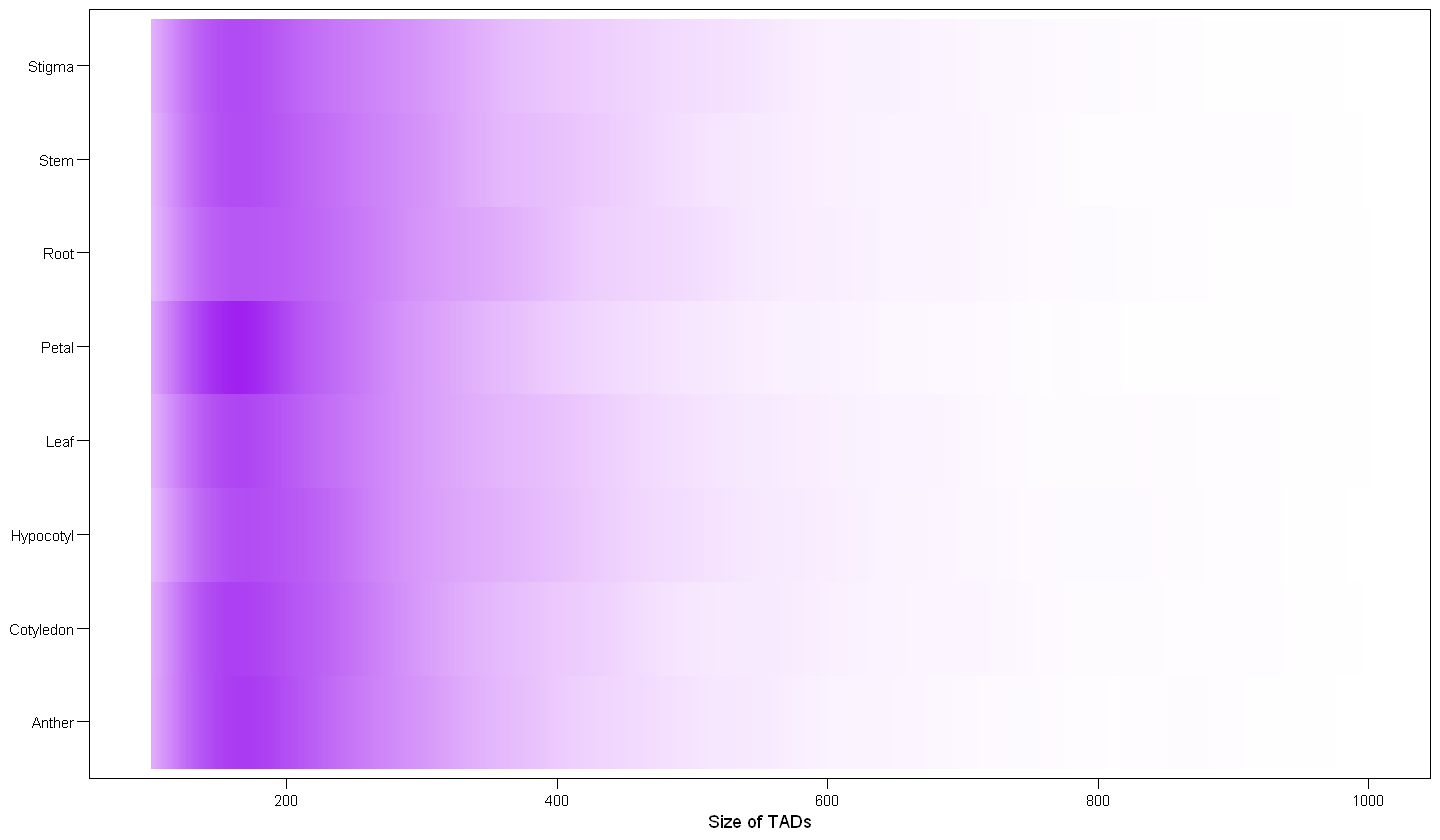

In [28]:
### 绘制TAD 大小热图
rm(list = ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/TAD_size')
library(ggplot2)

df <- read.csv('all_tissues_TAD_size.bed', sep = '\t', header = T)
df <- df[df$Size<=1000 & df$Subgenome=='Dt', ]
p <- ggplot(df, aes(x=Size, y=factor(Tissue)))+
  #geom_point()+
  #stat_bin2d(aes(fill = after_stat(count)))+
  stat_density(aes(fill = after_stat(density)), geom = "raster", position = "identity")+
  #stat_density(aes(fill = after_stat(density)), geom = "raster", position = "identity")+
  #stat_bin2d(aes(fill = after_stat(density)), binwidth = c(3,1))+
  #geom_tile(aes(fill=log2(status+1)))+
  #stat_density(geom="raster", position = "identity")+
  #facet_grid(Subgenome~.)+
  scale_x_continuous( name="Size of TADs", seq(0, 1000, 200))+
  labs(x="Size of TADs", y=NULL)+
 
  theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     #axis.line=element_line(linetype=1,color="black", size=0.25),
     panel.border = element_rect(fill=NA),
     legend.position='None',
     axis.text.x = element_text( color='black'),
     axis.text.y = element_text(color='black'),
     axis.ticks.length = unit(0.25, 'cm'),
     axis.ticks = element_line(color='black', size=0.25),
     legend.key.size = unit(10, "pt")
     )+
  # theme(
  #   panel.background = element_blank(), #去掉背景色
  #   panel.grid.major = element_blank(), #去掉网格
  #   panel.grid.minor = element_blank(),
  #   axis.line=element_line(linetype=1,color="black"),  #添加轴线   
  #   #axis.text.x = element_blank(),
  #   axis.text.y=element_text(size=16,angle=0,color="Black"), #设置轴字体
  #   axis.ticks = element_blank(),
  #   legend.text = element_text(size=6),
  #   legend.title = element_text(size=6),
  #   axis.title =element_text(size=10), #设置标签字体
  #   #axis.text.x = element_text(),
  #   legend.position='top' #调整图例,
  # )+
  # #theme(legend.position="none")+
  scale_fill_gradient(low = "white" , high = "purple")
p
ggsave(plot =p, filename = 'all_tissues_TAD_size_dt.pdf', height =3, width = 3)


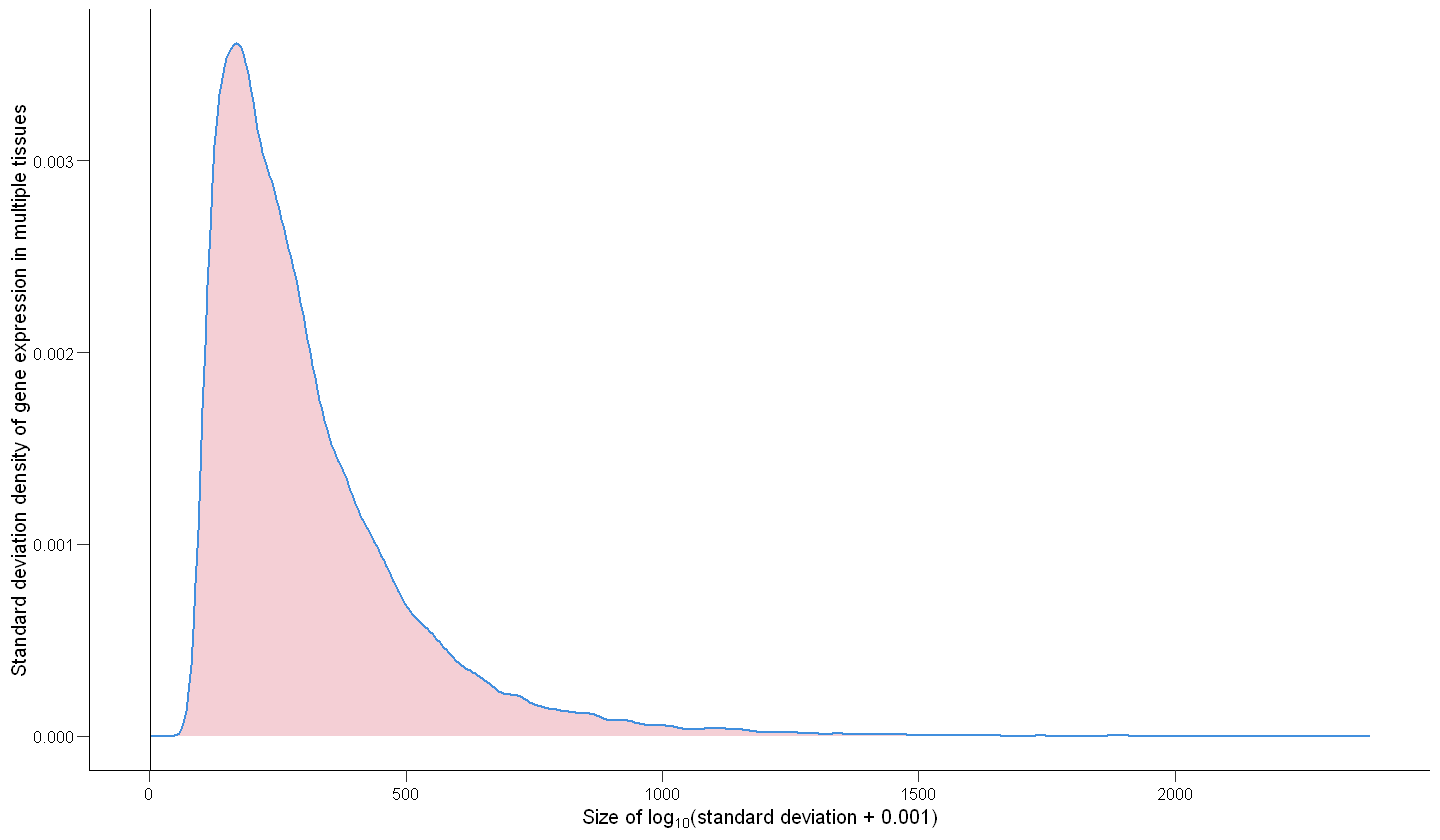

In [3]:
## 分析不同类型的loop对于基因表达的影响
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/TAD_size")
library(ggplot2)
library(ggpubr)
df <- read.csv("all_tissues_TAD_size.bed", sep = "\t", header =T)
#
x_titles <- expression(paste('Size of log'[10], "(standard deviation + 0.001)"))
fg <- ggplot(df, aes(x = Size)) +
#geom_histogram(aes(y = stat(density)), fill = 'white', color = '#E7B800') +
geom_density(color='#418FDE', size=0.8, alpha = 0.2, fill = "#C8102E") +
geom_vline(xintercept = 1.18)+
labs(y = "Standard deviation density of gene expression in multiple tissues", x = x_titles) +
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = "none",
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =10),
     axis.title = element_text(color = "black", size=12),
     axis.text.x = element_text()) 
fg
#ggsave(plot =fg, filename = 'J668_all_tissue_average_TPM_std2.pdf', height =3, width = 4)

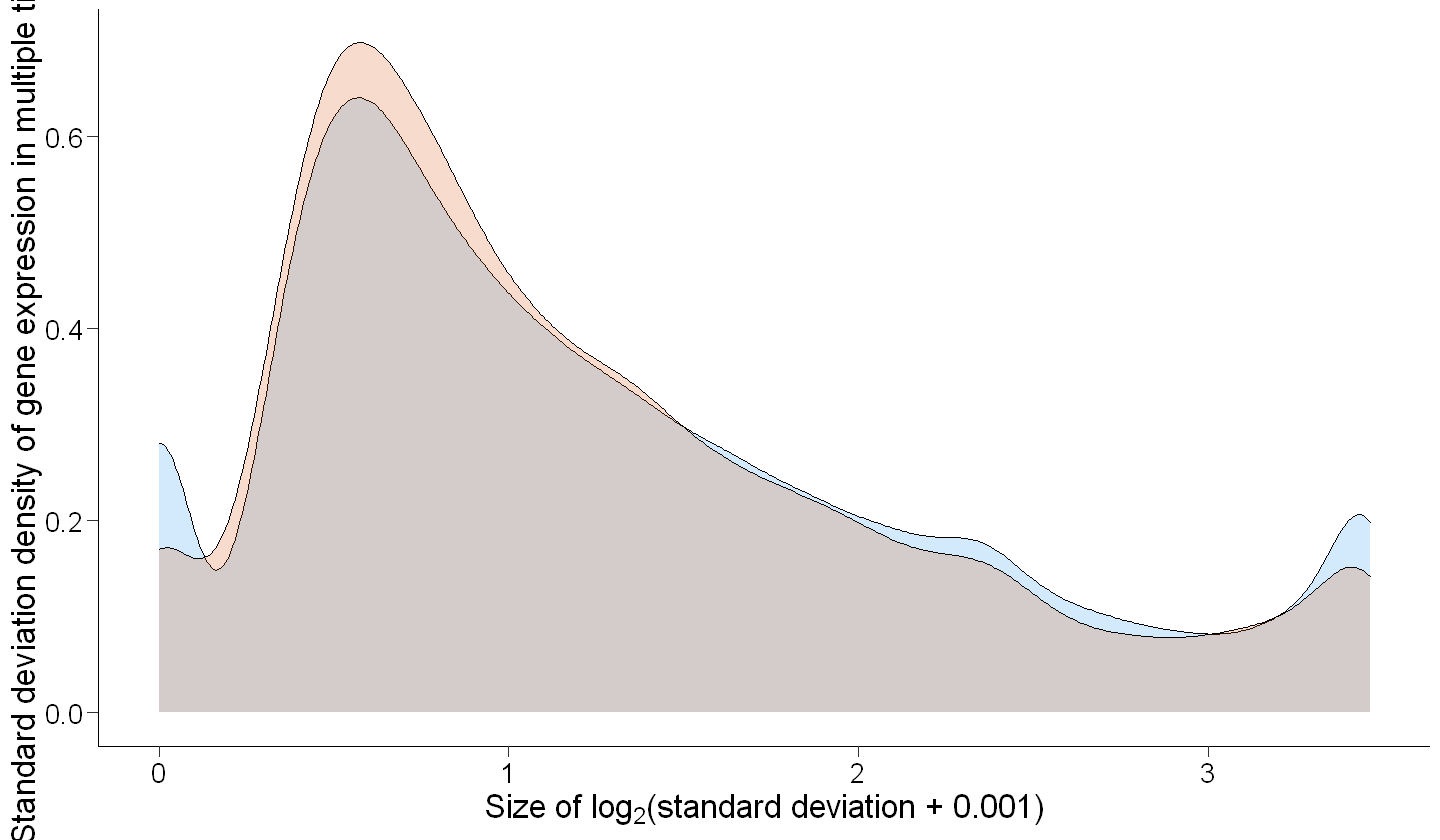

In [3]:
## 分析动态和保守的subcpt 其SV 变化
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/CALDER2/Gene_SV")
library(ggplot2)
library(ggpubr)
df <- read.csv("Stable_Dynamic_subcpt_Gene_SV.csv",  header =T)
x_titles <- expression(paste('Size of log'[2], "(standard deviation + 0.001)"))
fg <- ggplot(df, aes(x = SV, fill=Tags)) +
#geom_histogram(aes(y = stat(density)), fill = 'white', color = '#E7B800') +
geom_density(alpha = 0.2) +
#geom_vline(xintercept = 1.18)+
labs(y = "Standard deviation density of gene expression in multiple tissues", x = x_titles) +
#facet_wrap(.~max_idx)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.x = element_text(size = 16)) +
scale_fill_manual(values = c("#2196F3", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#69A71E", "#E2AE09", "#E6191E", "#1E79B2", "#df6b24", '#A55CED', "#607D8B", "#efdab4"))
fg
#ggsave(plot =fg, filename = 'unique_tissue_exp_gene_std.pdf', height =10, width = 12)

[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

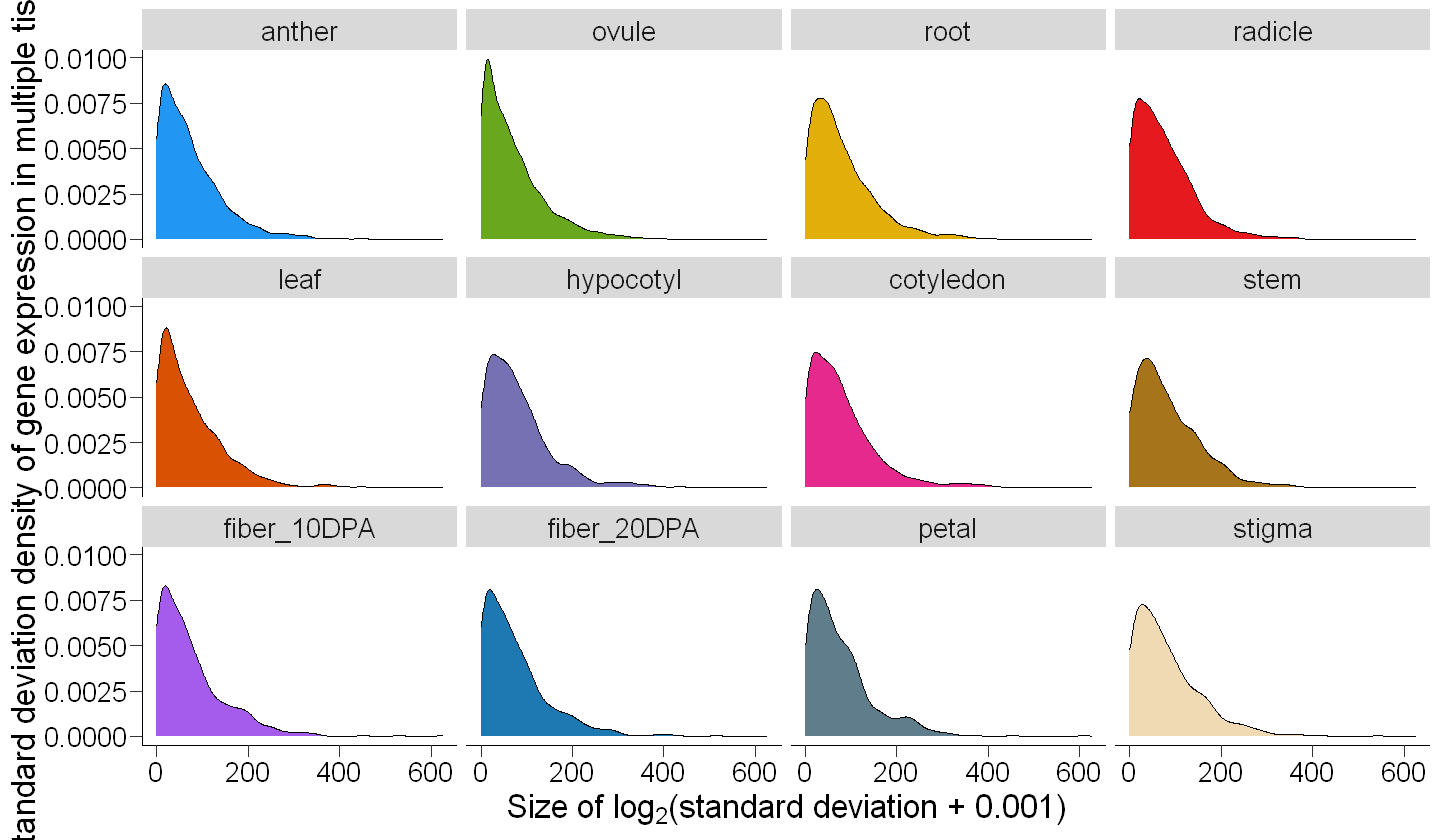

In [14]:
## 分析组织特异性基因与TAD边界的距离
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)

rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene")
library(ggplot2)
library(ggpubr)
df <- read.csv("J668_all_tissues_gene_TAD_distances.csv", header =T)
df <- within(df, tissues <- factor(tissues, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df, levels(tissues))
df_TSG = df[df$TSG_tags=='TSG', ]
x_titles <- expression(paste('Size of log'[2], "(standard deviation + 0.001)"))
fg <- ggplot(df_TSG, aes(x = TAD_distance2/1000, fill=tissues)) +
#geom_histogram(aes(y = stat(density)), fill = 'white', color = '#E7B800') +
geom_density() +
#geom_vline(xintercept = 1.18)+
labs(y = "Standard deviation density of gene expression in multiple tissues", x = x_titles) +
facet_wrap(.~tissues)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.x = element_text(size = 16)) +
scale_fill_manual(values = c("#2196F3", "#69A71E", "#E2AE09", "#E6191E", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#A55CED", "#1E79B2" , "#607D8B", "#efdab4"))
fg
#ggsave(plot =fg, filename = 'unique_tissue_exp_gene_std.pdf', height =10, width = 12)

[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

Picking joint bandwidth of 15.6

Picking joint bandwidth of 17.3

Picking joint bandwidth of 15.6

Picking joint bandwidth of 17.3

Picking joint bandwidth of 15.6

Picking joint bandwidth of 17.3



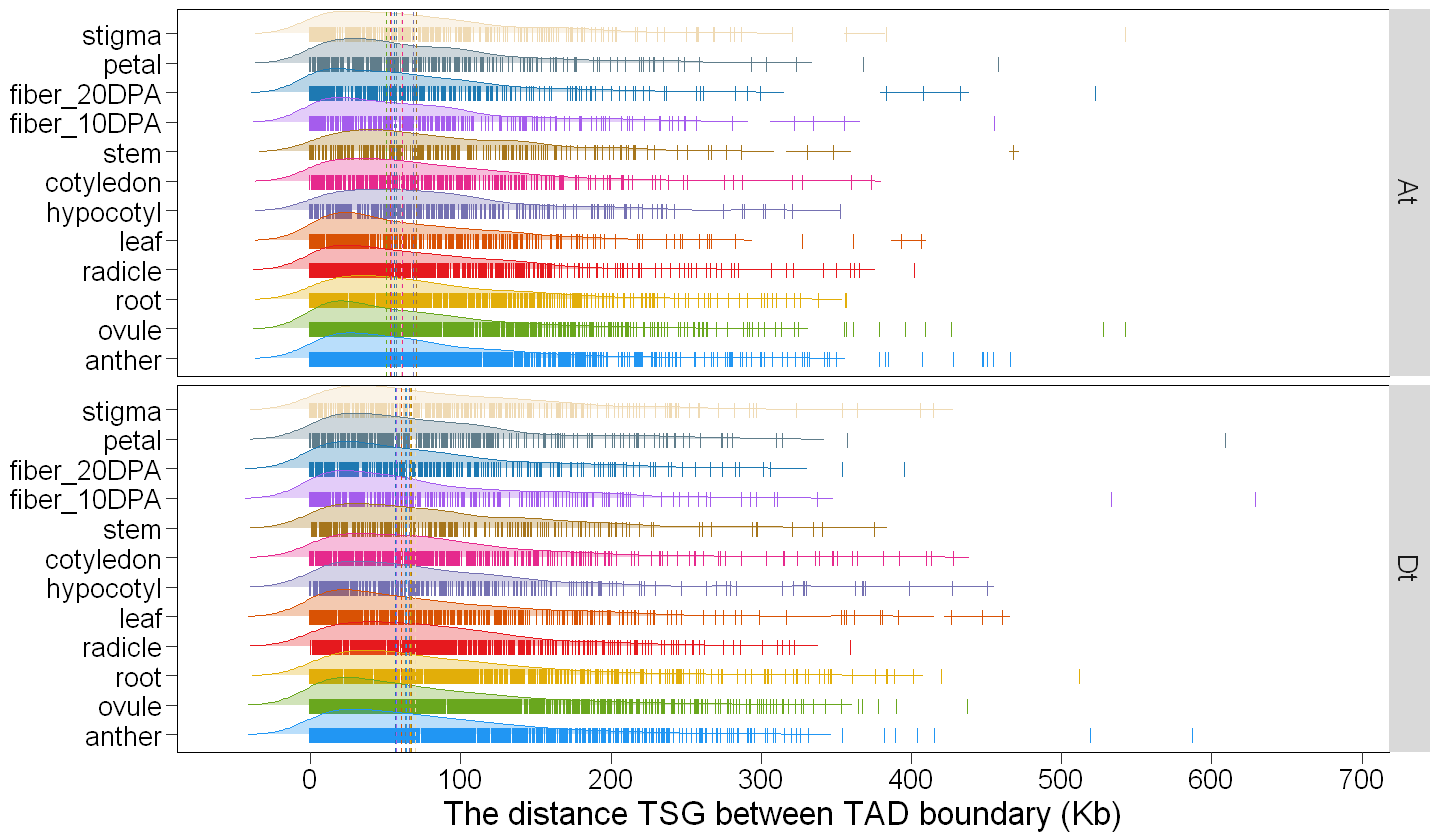

In [11]:
## 分析组织特异性基因与TAD边界的距离
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
library(ggridges)
library(dplyr)
library(plyr)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene")
library(ggplot2)
library(ggpubr)
df <- read.csv("J668_all_tissues_gene_TAD_distances.csv", header =T)
df <- within(df, tissues <- factor(tissues, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df, levels(tissues))
df_TSG = df[df$TSG_tags=='TSG', ]
df_median <- ddply(df_TSG, c("tissues", "subg"), summarise, grp.median=median(TSS_TAD_distance2/1000))
# df_TSG_At = dplyr::filter(df_TSG, grepl("Ghir_A", chrs))
# df_TSG_Dt = dplyr::filter(df_TSG, grepl("Ghir_D", chrs))
fg <- ggplot(df_TSG, aes(x = TSS_TAD_distance2/1000, y = tissues, fill=tissues, color=tissues)) +
geom_density_ridges(  jittered_points=TRUE, scale = .95, rel_min_height = .01,
    point_shape = "|", point_size = 3, size = 0.25,
    position = position_points_jitter(height = 0)) +
geom_vline(data=df_median, aes(xintercept=grp.median, color=tissues),
             linetype="dashed")+
labs(y = NULL, x = "The distance TSG between TAD boundary (Kb)") +
facet_grid(subg~.)+
#theme_ridges(center = TRUE)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     panel.border = element_rect(fill=NA),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.y = element_text(size = 16)) +

scale_fill_manual(values = c("#2196F350", "#69A71E50", "#E2AE0950", "#E6191E50", "#D9520450", "#7571B250", "#E6298D50", "#A6751B50", "#A55CED50", "#1E79B250" , "#607D8B50", "#efdab450"))+
scale_color_manual(values = c("#2196F3", "#69A71E", "#E2AE09", "#E6191E", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#A55CED", "#1E79B2" , "#607D8B", "#efdab4"))+
scale_x_continuous(breaks=seq(0,700, 100))
fg
ggsave(plot =fg, filename = 'J668_all_tissues_gene_TAD_distances.pdf', height =10, width = 12)
ggsave(plot =fg, filename = 'J668_all_tissues_gene_TAD_distances.png', height =10, width = 12)

[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

Picking joint bandwidth of 6.73

Picking joint bandwidth of 7.17

Picking joint bandwidth of 6.73

Picking joint bandwidth of 7.17



ERROR: Error in grDevices::pdf(file = filename, ..., version = version): cannot open file 'J668_all_tissues_gene_TAD_distances.pdf'


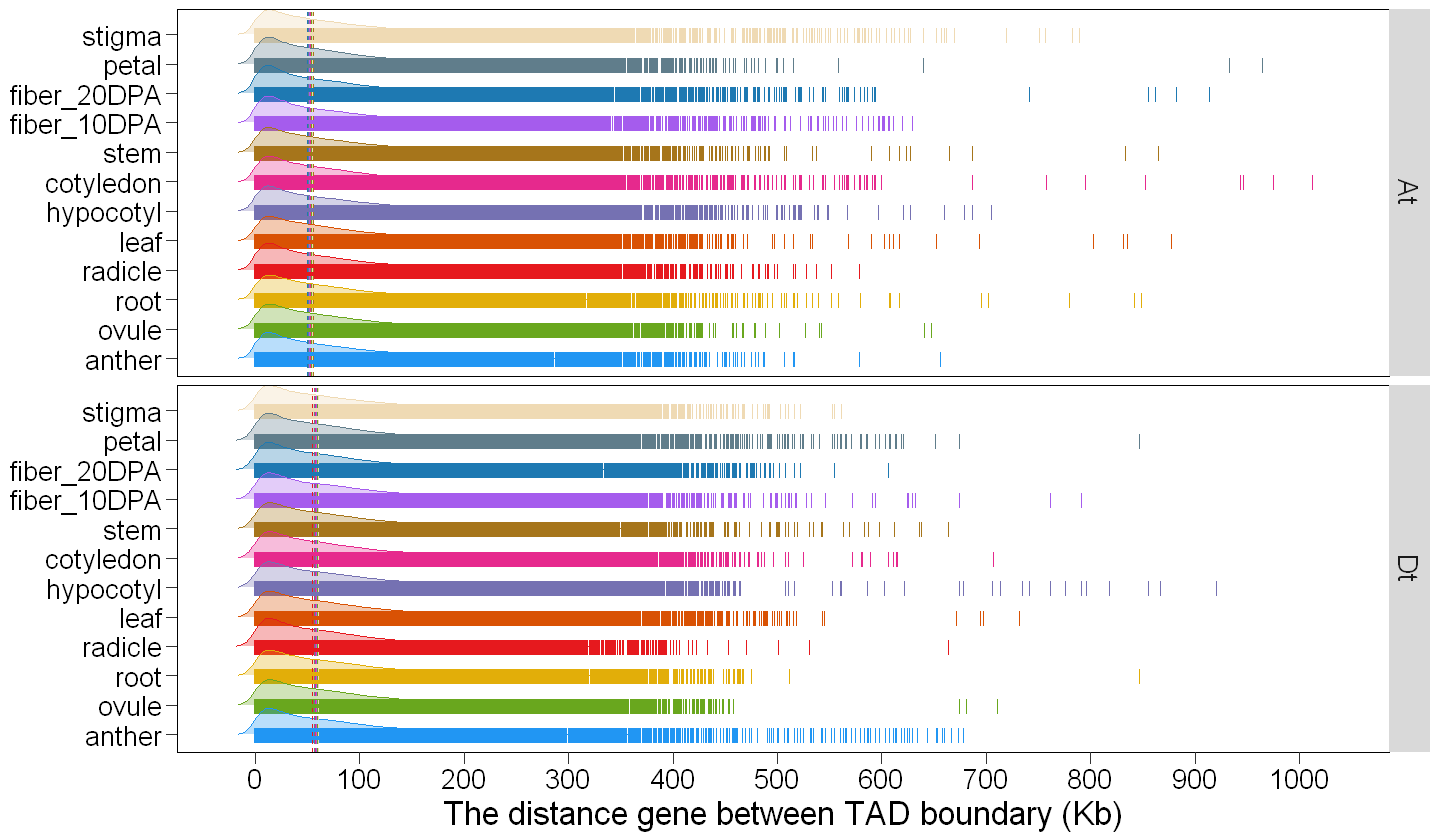

In [14]:
## 分析基因与TAD边界的距离
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
library(ggridges)
library(dplyr)
library(plyr)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene")
library(ggplot2)
library(ggpubr)
df <- read.csv("J668_all_tissues_gene_TAD_distances.csv", header =T)
df <- within(df, tissues <- factor(tissues, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df, levels(tissues))
df_TSG = df[df$TSG_tags=='TSG', ]
df_median <- ddply(df, c("tissues", "subg"), summarise, grp.median=median(TSS_TAD_distance2/1000))
# df_TSG_At = dplyr::filter(df_TSG, grepl("Ghir_A", chrs))
# df_TSG_Dt = dplyr::filter(df_TSG, grepl("Ghir_D", chrs))
fg <- ggplot(df, aes(x = TSS_TAD_distance2/1000, y = tissues, fill=tissues, color=tissues)) +
geom_density_ridges(  jittered_points=TRUE, scale = .95, rel_min_height = .01,
    point_shape = "|", point_size = 3, size = 0.25,
    position = position_points_jitter(height = 0)) +
geom_vline(data=df_median, aes(xintercept=grp.median, color=tissues),
             linetype="dashed")+
labs(y = NULL, x = "The distance gene between TAD boundary (Kb)") +
facet_grid(subg~.)+
#theme_ridges(center = TRUE)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     panel.border = element_rect(fill=NA),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.y = element_text(size = 16)) +

scale_fill_manual(values = c("#2196F350", "#69A71E50", "#E2AE0950", "#E6191E50", "#D9520450", "#7571B250", "#E6298D50", "#A6751B50", "#A55CED50", "#1E79B250" , "#607D8B50", "#efdab450"))+
scale_color_manual(values = c("#2196F3", "#69A71E", "#E2AE09", "#E6191E", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#A55CED", "#1E79B2" , "#607D8B", "#efdab4"))+
scale_x_continuous(breaks=seq(0,1000, 100))
fg
ggsave(plot =fg, filename = 'J668_all_tissues_gene_TAD_distances.png', height =10, width = 12)
ggsave(plot =fg, filename = 'J668_all_tissues_gene_TAD_distances.pdf', height =10, width = 12)


[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

       tissues subg grp.median
1       anther   At    54.7780
2       anther   Dt    59.7260
3        ovule   At    55.9500
4        ovule   Dt    64.1815
5         root   At    57.6570
6         root   Dt    68.5155
7      radicle   At    53.7170
8      radicle   Dt    58.4860
9         leaf   At    58.3870
10        leaf   Dt    57.8380
11   hypocotyl   At    63.2000
12   hypocotyl   Dt    64.3845
13   cotyledon   At    57.6300
14   cotyledon   Dt    62.0170
15        stem   At    56.4370
16        stem   Dt    62.3790
17 fiber_10DPA   At    59.0120
18 fiber_10DPA   Dt    66.2570
19 fiber_20DPA   At    55.6585
20 fiber_20DPA   Dt    56.6940
21       petal   At    53.9640
22       petal   Dt    58.7820
23      stigma   At    57.6300
24      stigma   Dt    62.8805


Picking joint bandwidth of 17.2

Picking joint bandwidth of 18.2



ERROR: Error in grDevices::pdf(file = filename, ..., version = version): cannot open file 'J668_TSG_fiber_20DPA_TAD_distances.pdf'


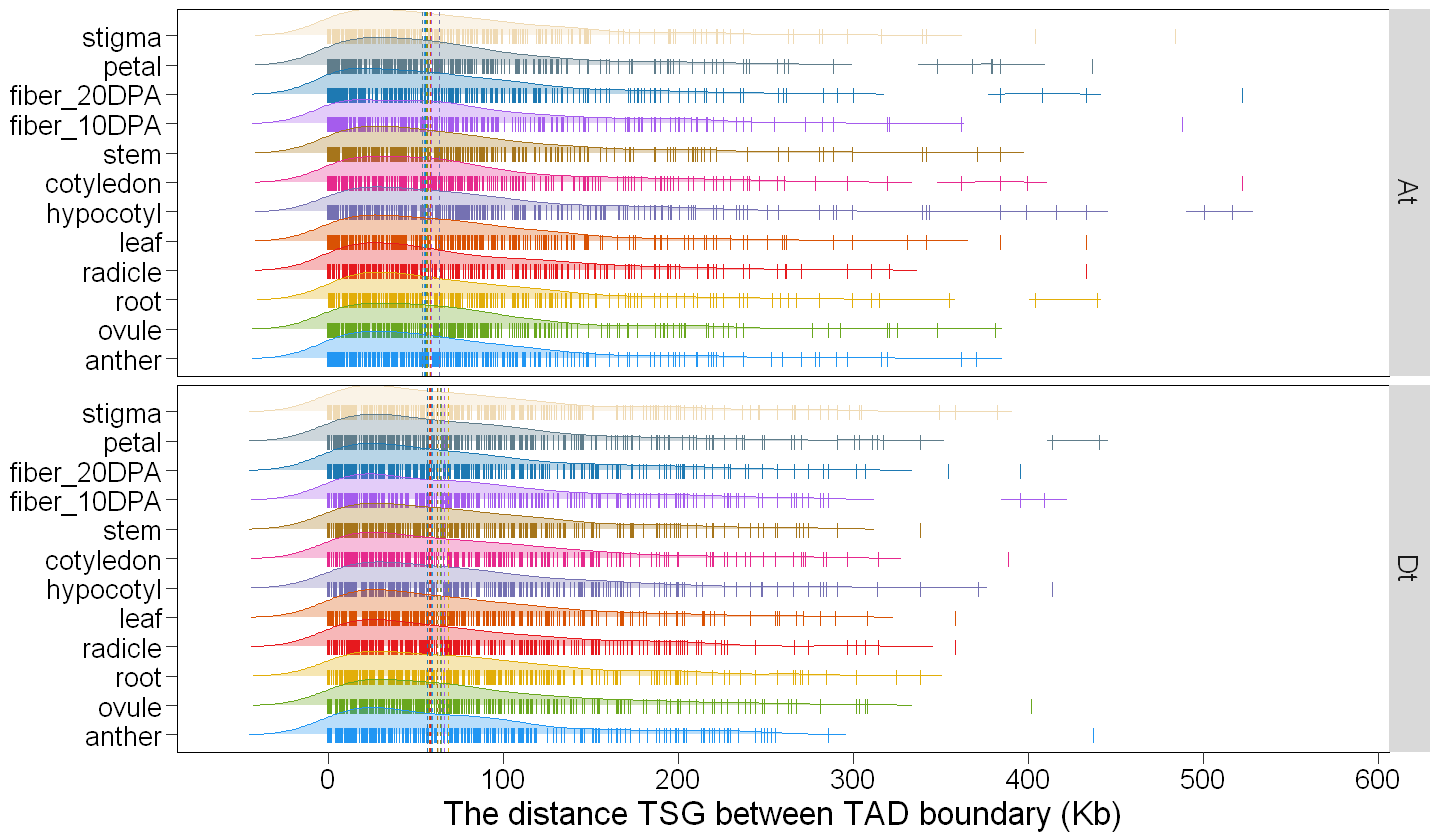

In [18]:
## 分析组织特异性基因与TAD边界的距离
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
library(ggridges)
library(dplyr)
library(plyr)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene")
library(ggplot2)
library(ggpubr)
df <- read.csv("J668_TSG_fiber_20DPA_TAD_distances.csv", header =T)
df <- within(df, tissues <- factor(tissues, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df, levels(tissues))
#df_TSG = df[df$TSG_tags=='TSG', ]
df_median <- ddply(df, c("tissues", "subg"), summarise, grp.median=median(TSS_TAD_distance2/1000))
# df_TSG_At = dplyr::filter(df_TSG, grepl("Ghir_A", chrs))
# df_TSG_Dt = dplyr::filter(df_TSG, grepl("Ghir_D", chrs))
print(df_median)
fg <- ggplot(df, aes(x = TSS_TAD_distance2/1000, y = tissues, fill=tissues, color=tissues)) +
geom_density_ridges( jittered_points=TRUE, scale = .95, rel_min_height = .01,
    point_shape = "|", point_size = 3, size = 0.25,
    position = position_points_jitter(height = 0)) +
geom_vline(data=df_median, aes(xintercept=grp.median, color=tissues),
             linetype="dashed")+
labs(y = NULL, x = "The distance TSG between TAD boundary (Kb)") +
facet_grid(subg~.)+
#theme_ridges(center = TRUE)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     panel.border = element_rect(fill=NA),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.y = element_text(size = 16)) +

scale_fill_manual(values = c("#2196F350", "#69A71E50", "#E2AE0950", "#E6191E50", "#D9520450", "#7571B250", "#E6298D50", "#A6751B50", "#A55CED50", "#1E79B250" , "#607D8B50", "#efdab450"))+
scale_color_manual(values = c("#2196F3", "#69A71E", "#E2AE09", "#E6191E", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#A55CED", "#1E79B2" , "#607D8B", "#efdab4"))+
scale_x_continuous(breaks=seq(0,700, 100))
fg
ggsave(plot =fg, filename = 'J668_TSG_fiber_20DPA_TAD_distances.pdf', height =10, width = 12)
ggsave(plot =fg, filename = 'J668_TSG_fiber_20DPA_TAD_distances.png', height =10, width = 12)

[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

Picking joint bandwidth of 2.02

Picking joint bandwidth of 2.02



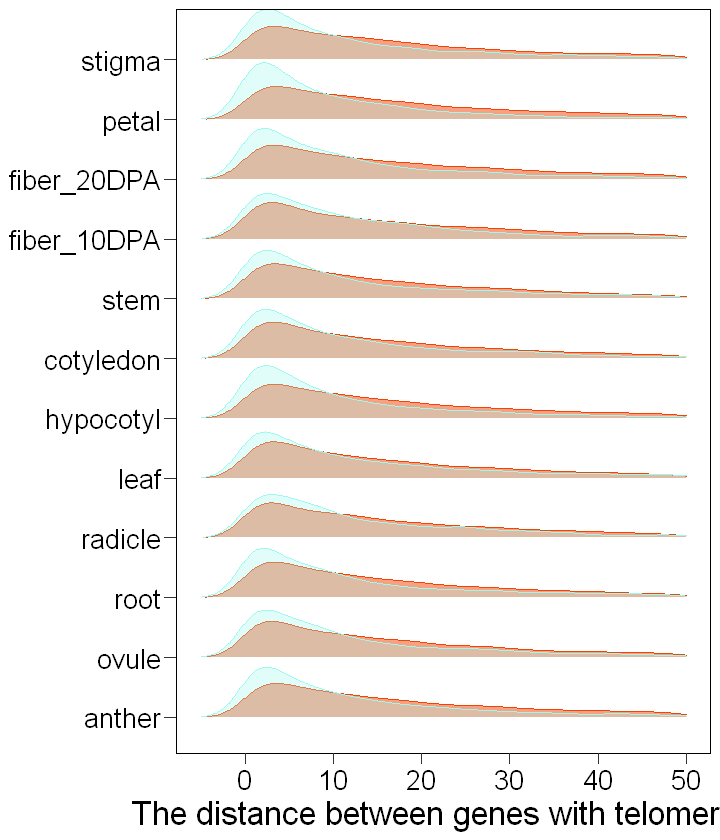

In [41]:
## 分析基因与TAD边界的距离
options(repr.plot.width=6)
library(ggplot2)
library(reshape2)
library(ggridges)
library(dplyr)
library(plyr)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position")
library(ggplot2)
library(ggpubr)
df <- read.csv("J668_anther_bias_gene_chr_position.csv", header =T)
df <- within(df, tissues <- factor(tissues, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df, levels(tissues))
#df_median <- ddply(df, c("tissues", "subg"), summarise, grp.median=median(TSS_TAD_distance2/1000))
fg <- ggplot(df, aes(x = position*100, y = tissues, fill=tags, color=tags)) +
geom_density_ridges(  jittered_points=FALSE, scale = .95, rel_min_height = .01,
    position = position_points_jitter(height = 0)) +
# geom_vline(data=df_median, aes(xintercept=grp.median, color=tissues),
#              linetype="dashed")+
labs(y = NULL, x = "The distance between genes with telomeres") +
#facet_grid(subg~.)+
#theme_ridges(center = TRUE)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     panel.border = element_rect(fill=NA),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.y = element_text(size = 16)) +

scale_fill_manual(values = c("#F2440580", "#9EF8EE50"))+
scale_color_manual(values = c("#F24405", "#9EF8EE"))+
scale_x_continuous(limits=c(-5, 50), breaks=seq(0, 50, 10))
fg
ggsave(plot =fg, filename = 'J668_anther_bias_gene_chr_position.pdf', height =5.6, width = 6)
# ggsave(plot =fg, filename = 'J668_all_tissues_gene_TAD_distances.pdf', height =10, width = 12)


Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 14 rows containing non-finite values (`stat_density()`)."


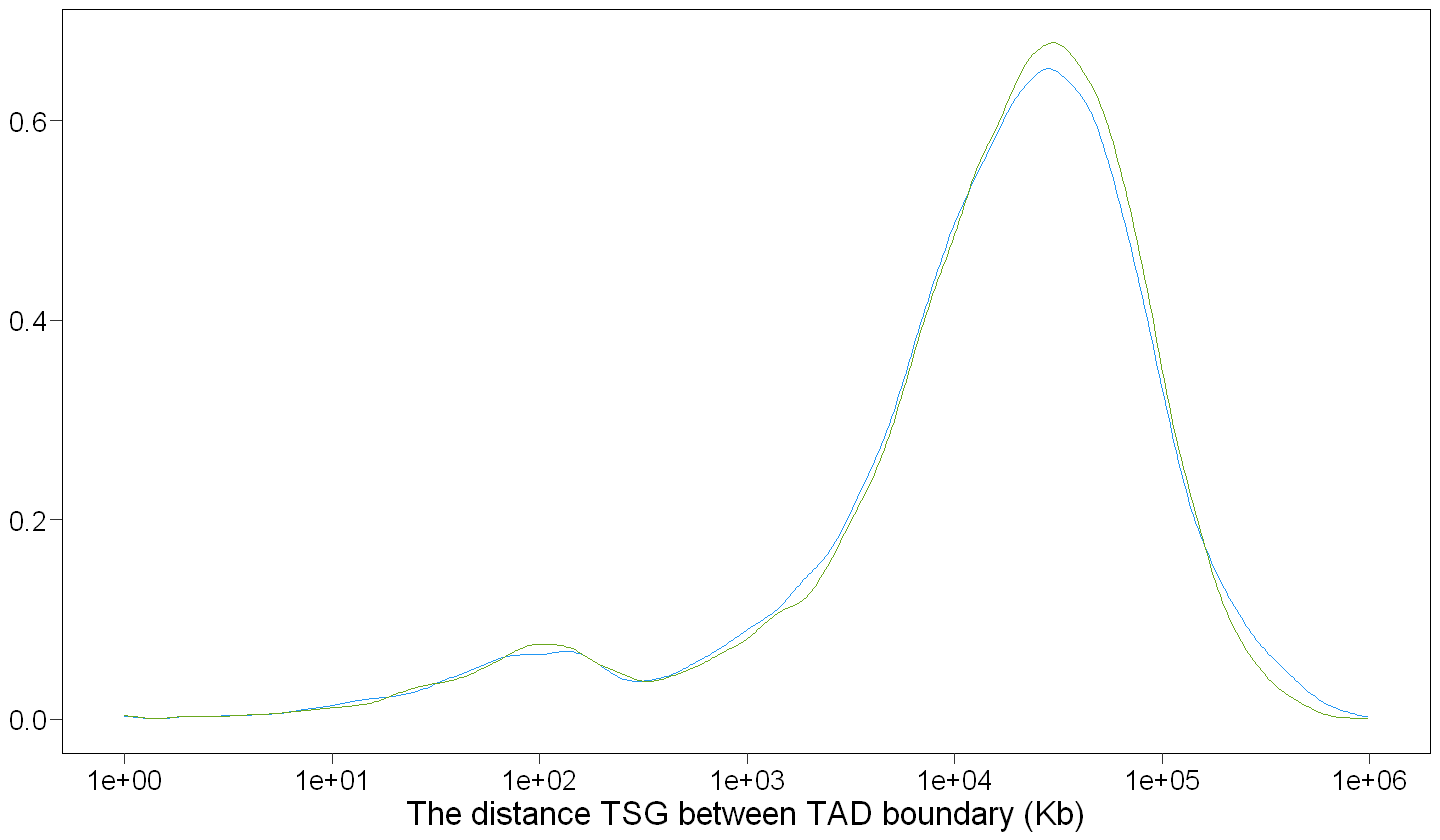

In [27]:
## 分析组织特异性基因与TAD边界的距离
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
library(ggridges)
library(dplyr)
library(plyr)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/ATAC/ATAC_peaks_TSS_density")
library(ggplot2)
library(ggpubr)
df <- read.csv("J668_anther_ATAC_clost.csv")
fg <- ggplot(df, aes(x = Distance,color=subg)) +
geom_density() +
labs(y = NULL, x = "The distance TSG between TAD boundary (Kb)") +
#facet_grid(subg~.)+
#theme_ridges(center = TRUE)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     panel.border = element_rect(fill=NA),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.y = element_text(size = 16)) +

scale_fill_manual(values = c("#2196F350", "#69A71E50", "#E2AE0950", "#E6191E50", "#D9520450", "#7571B250", "#E6298D50", "#A6751B50", "#A55CED50", "#1E79B250" , "#607D8B50", "#efdab450"))+
scale_color_manual(values = c("#2196F3", "#69A71E", "#E2AE09", "#E6191E", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#A55CED", "#1E79B2" , "#607D8B", "#efdab4"))+
scale_x_log10(breaks=c(1, 10, 100, 1000, 10000, 100000, 1000000))
fg
#ggsave(plot =fg, filename = 'J668_TSG_fiber_20DPA_TAD_distances.pdf', height =10, width = 12)
#ggsave(plot =fg, filename = 'J668_TSG_fiber_20DPA_TAD_distances.png', height =10, width = 12)

[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

Warning message:
"`position_dodge()` requires non-overlapping x intervals"
Warning message:
"`position_dodge()` requires non-overlapping x intervals"


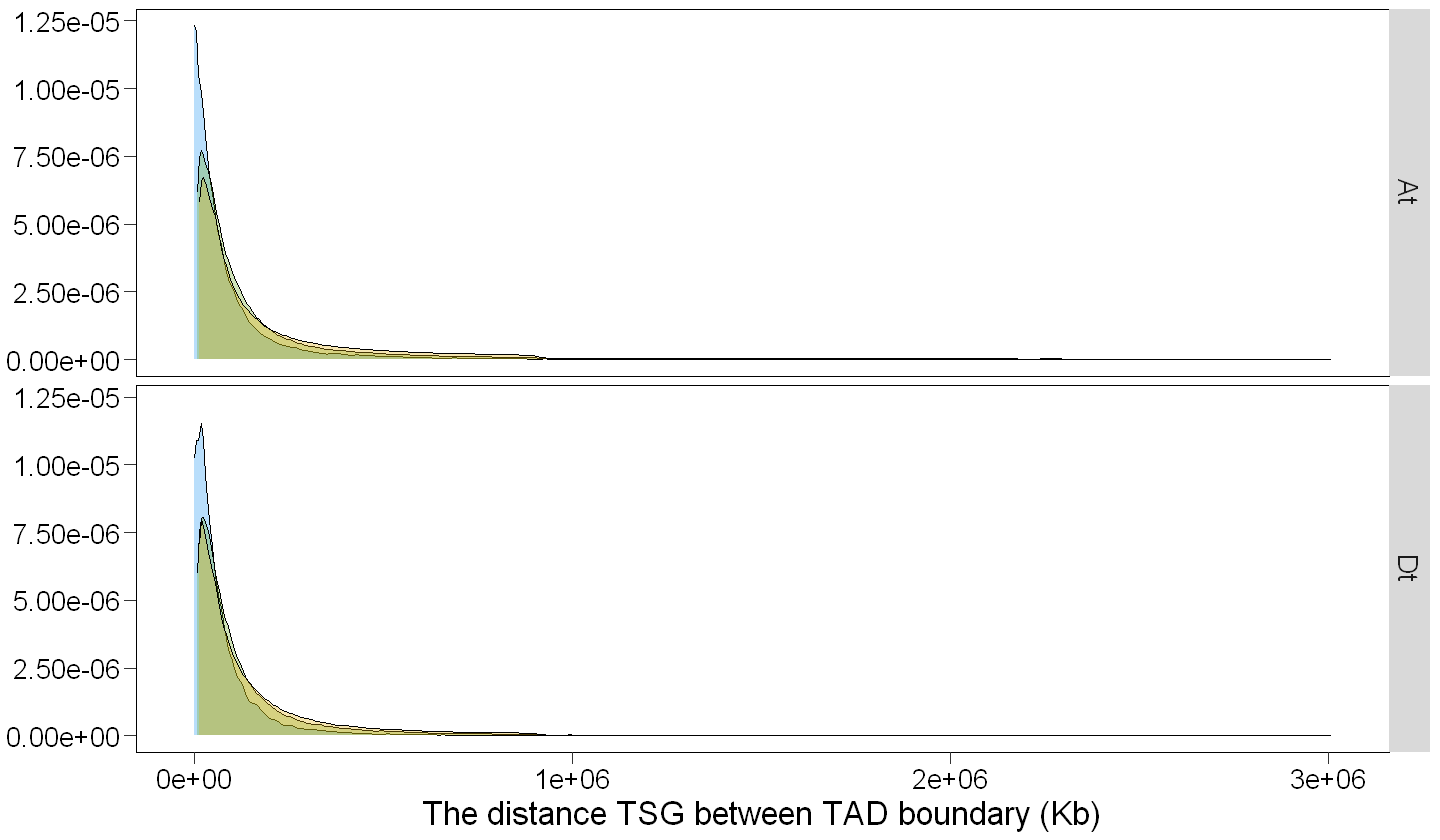

In [2]:
## 分析组织特异性基因与TAD边界的距离
options(repr.plot.width=12)
library(ggplot2)
library(reshape2)
library(ggridges)
library(dplyr)
library(plyr)
rm(list = ls())
setwd("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density")
library(ggplot2)
library(ggpubr)
df <- read.csv("J668_loop_length_type.csv", header =T)
df <- within(df, tissues <- factor(tissues, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df, levels(tissues))
df_TSG = df[df$tissues=='anther', ]
fg <- ggplot(df, aes(x = length,  fill=tags)) +
geom_density(position=position_dodge(width =20000)) +
# geom_vline(data=df_median, aes(xintercept=grp.median, color=tissues),
#              linetype="dashed")+
labs(y = NULL, x = "The distance TSG between TAD boundary (Kb)") +
facet_grid(subg~.)+
#theme_ridges(center = TRUE)+
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     panel.border = element_rect(fill=NA),
     axis.line = element_line(linetype = 1),
     legend.position = 'None',
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black", size =16),
     axis.title = element_text(color = "black", size=20),
     axis.text.x = element_text(),
     strip.text.y = element_text(size = 16)) +

scale_fill_manual(values = c("#2196F350", "#69A71E50", "#E2AE0950", "#E6191E50", "#D9520450", "#7571B250", "#E6298D50", "#A6751B50", "#A55CED50", "#1E79B250" , "#607D8B50", "#efdab450"))+
scale_color_manual(values = c("#2196F3", "#69A71E", "#E2AE09", "#E6191E", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#A55CED", "#1E79B2" , "#607D8B", "#efdab4"))
#scale_x_continuous(breaks=seq(0,700, 100))
fg
#ggsave(plot =fg, filename = 'J668_loop_length.pdf', height =10, width = 12)
#ggsave(plot =fg, filename = 'J668_all_tissues_gene_TAD_distances.png', height =10, width = 12)